In [1]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora, models
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

from nltk import tokenize
from transformers import AutoModel, AutoTokenizer

from source.Topic.Utils import *
from source.Topic.Model import *
import re

Using TensorFlow backend.


In [4]:
#meta = pd.read_csv("metadata.csv")
#meta = pd.read_csv("demo_text_chunk_0.csv", sep=";")

In [2]:
meta = pd.read_csv("kaffee_reviews.csv")
meta.drop(columns=["index"], inplace=True)

In [3]:
meta.head()

,brand,rating,review
0,GEPA Kaffee,5,Wenn ich Bohnenkaffee trinke (auf Arbeit trink...
1,GEPA Kaffee,5,Für mich ist dieser Kaffee ideal. Die Grundvor...
2,GEPA Kaffee,5,Ich persönlich bin insbesondere von dem Geschm...
3,GEPA Kaffee,5,ganz abgesehen vom geschmack legt gepa inzwisc...
4,GEPA Kaffee,5,Seit Jahren kaufe ich am liebsten den Kaffee u...


In [19]:
sentences = []
sentence_to_summary = {}
for i, body in enumerate(meta.body):
    for sentence in tokenize.sent_tokenize(body, language="german"):
        sentences.append(sentence.replace("-", " ").replace("   ", " - "))
        sentence_to_summary[sentences.__len__() - 1] = i

In [3]:
documents = meta.iloc[:, 0]
documents=documents.reset_index()
documents.drop("index", inplace = True, axis = 1)

##create pandas data frame with all abstracts, use as input corpus
documents["index"] = documents.index.values
documents.head(3)

,body,index
0,"Die Deutschen gelten als Aktienmuffel, daran ä...",0
1,Für manche Beschäftigte ist es jedes Jahr ein ...,1
2,Als sich die Thyssenkrupp-Eigner Anfang des Ja...,2


In [3]:
method = "LDA_BERT"
samp_size = len(meta.review)
ntopic = 5

rws = meta.review
#rws = pd.Series(sentences)
sentences, token_lists, idx_in = preprocess(rws, samp_size=samp_size)
# Define the topic model object
# tm = Topic_Model(k = 10), method = TFIDF)

Preprocessing raw texts ...
Preprocessing raw texts. Done!


In [4]:
tm = Topic_Model(k=ntopic, method=method)
# Fit the topic model by chosen method
tm.fit(sentences, token_lists)
# Evaluate using metrics
#with open("/kaggle/working/{}.file".format(tm.id), "wb") as f:
#    pickle.dump(tm, f, pickle.HIGHEST_PROTOCOL)

Clustering embeddings ...
Getting vector representations for LDA ...
Getting vector representations for LDA. Done!
Getting vector representations for BERT ...
Getting vector representations for BERT. Done!
Fitting Autoencoder ...
Fitting Autoencoder Done!
Clustering embeddings. Done!


In [5]:
print('Coherence:', get_coherence(tm, token_lists, 'c_v'))
print('Silhouette Score:', get_silhouette(tm))
# visualize and save img

Coherence: 0.2979755125903355
Silhouette Score: 0.5565625


Calculating UMAP projection ...
Calculating UMAP projection. Done!
Getting wordcloud for topic 0 ...
Getting wordcloud for topic 0. Done!
Getting wordcloud for topic 1 ...
Getting wordcloud for topic 1. Done!
Getting wordcloud for topic 2 ...
Getting wordcloud for topic 2. Done!
Getting wordcloud for topic 3 ...
Getting wordcloud for topic 3. Done!
Getting wordcloud for topic 4 ...
Getting wordcloud for topic 4. Done!


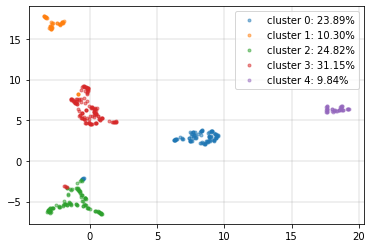

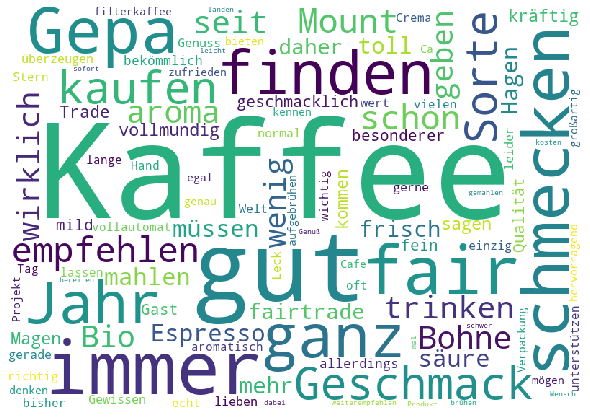

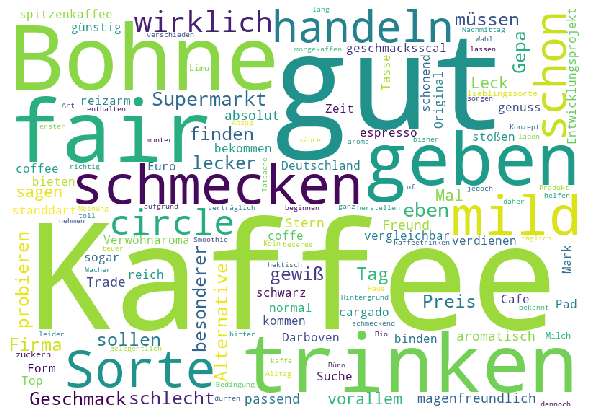

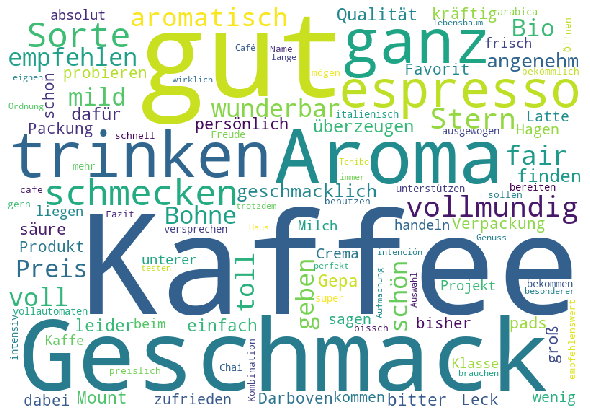

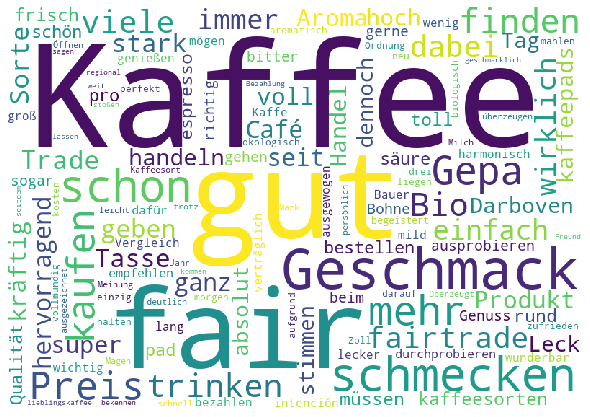

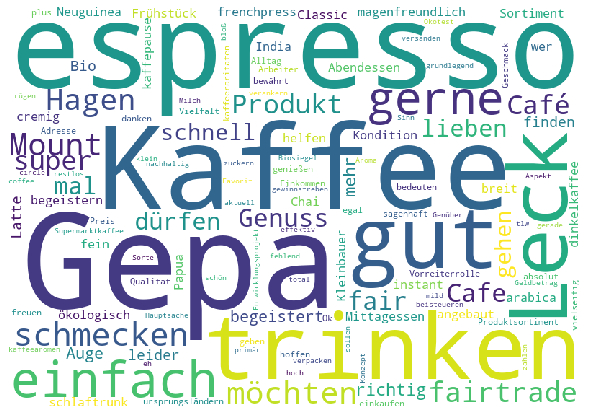

In [5]:
visualize(tm)
for i in range(tm.k):
    get_wordcloud(tm, token_lists, i)

In [25]:
tm.cluster_model.labels_

array([1, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 2, 1, 3, 3, 0, 2, 0,
       1, 1, 3, 1, 2, 1, 3, 1, 2, 0, 0, 3, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 3, 3, 0, 0, 3, 0, 3, 2, 0, 1, 1, 0, 0, 1, 2, 3, 0, 1, 1, 2,
       3, 0, 3, 0, 3, 3, 0, 2, 0, 2, 2, 1, 2, 3, 1, 0, 2, 2, 0, 2, 2, 2,
       3, 1, 1, 1, 0, 2, 2, 1, 0, 3, 2, 0, 2, 0, 1, 3, 3, 0, 1, 1, 1, 0,
       0, 3, 2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 2, 1, 1, 3, 2, 0, 1, 0, 1,
       3, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 3, 3, 2, 0,
       0, 1, 3, 0, 0, 2, 1, 3, 3, 0, 2, 2, 2, 1, 0, 3, 1, 1, 0, 2, 3, 1,
       2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 3, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 0, 0, 0, 2, 2, 0, 3, 2, 0, 0, 0, 2, 3, 3, 0, 2, 2, 1, 0, 1, 2,
       0, 3, 1, 0, 1, 2, 3, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 0, 3,
       3, 1, 1, 1, 2, 0, 3, 1, 3, 0, 3, 3, 2, 3, 1, 0, 3, 1, 3, 0, 0, 2,
       3, 1, 2, 0, 0, 3, 0, 3, 3, 2, 1, 3, 1, 1, 0, 2, 3, 0, 1, 3, 2, 3,
       0, 2, 0, 1, 3, 0, 3, 2, 1, 0, 0, 1, 0])

In [19]:
clusters = [[] for _ in range(ntopic)]
for text_i, cluster in enumerate(tm.cluster_model.labels_):
    clusters[cluster].append(meta.review[text_i])
clusters[2][0]

'Wenn ich Bohnenkaffee trinke (auf Arbeit trinke ich wegen der Kapselmaschine nur Kaffee aus Granulat), dann in jedem Fall GEPA-Kaffee. Schon in Studium und mit Bafög war es mit der höhere Preis (verglichen mit den herkömmlichen Kaffees) immer Wert, GEPA zu kaufen. Zum einen, weil ich ihn mit gutem Gewissen trinken kann, da er aus fairem Handel stammt und seine Herstellung nicht auf Ausbeutung basiert. Zum anderen, weil er auch bei Blindverkostungen immer deutlich besser schmeckt, als andere Kaffeesorten. Am liebsten trinke ich stärkeren Kaffee (z.B. „Kolumbien Pur“), aber auch die milderen Sorten hatte ich schon und war mit dem Geschmack sehr zufrieden. Mein Partner kauft seit wir uns kennen auch nur noch GEPA-Kaffees, da ich ihn überzeugen konnte.'

In [35]:
clusters = [[] for _ in range(ntopic)]
for i, cluster in enumerate(tm.cluster_model.labels_):
    clusters[cluster].append(sentence_to_summary[i])

In [36]:
for i in clusters:
    print(i)

[0, 0, 0, 1, 1, 2, 2, 2, 3, 4, 6, 6, 7, 8, 9, 10, 11]
[0, 0, 1, 1, 2, 3, 4, 5, 9, 9, 11]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 6, 6, 6, 7, 7, 9, 9, 9, 10, 10, 11, 11, 11]
[0, 0, 0, 0, 0, 1, 1, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 6, 6, 6, 7, 9, 10, 10, 10, 11, 11, 11]
[0, 0, 2, 2, 5, 6, 8, 8, 9, 9, 11]
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11]
[0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 4, 5, 5, 8, 8, 10, 10, 11]
[0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 4, 5, 5, 6, 6, 6, 6, 8, 9, 9]
[0, 0, 1, 2, 3, 3, 3, 4, 4, 5, 5, 6, 6, 9, 10, 10, 10, 10, 11]
[0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 4, 4, 5, 7, 9, 9, 9, 9, 10, 11, 11]
[0, 0, 0, 0, 1, 2, 3, 3, 6, 7, 7]
[0, 0, 0, 1, 2, 3, 3, 4, 4, 5, 6, 7, 7, 9, 11]
[0, 0, 0, 0, 1, 4, 6, 6, 7, 8, 9, 10, 10, 11, 11]
[0, 0, 1, 4, 4, 4, 5, 6, 9, 9, 11]
[0, 0, 1, 1, 2, 3, 4, 4, 5, 5, 5, 6, 9, 10, 11]


In [30]:
print(tm.cluster_model.labels_[0:60])
#print(tm.cluster_model.labels_[60:86])
#print(tm.cluster_model.labels_[86:105])
#sentence_to_summary

[1 1 0 1 1 1 2 2 1 0 1 1 0 1 1 2 1 3 3 0 2 0 1 1 3 1 2 1 3 1 2 0 0 3 1 2 1
 0 1 1 1 1 0 0 0 1 3 3 0 0 3 0 3 2 0 1 1 0 0 1]


In [7]:
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-german-cased")
model = AutoModel.from_pretrained("dbmdz/bert-base-german-cased")

In [9]:
foo = "Ich nutze von REWE Bio Röstkaffee Fairtrade die Kaffeepads für meine Senseomaschiene. Ich habe schon einige Biokaffees ausprobiert und muss sagen, dass mir der REWE Bio Röstkaffee Fairtrade am Besten schmeckt. Das Preis/Leistungsverhältnis ist super, wenn man bedenkt, wie teuer die original Senseopads sind (ohne Bio und Fairtradesiegel!)."
#word_tokenize(foo, language="german")
tokenizer.tokenize(foo)

['Ich',
 'nutz',
 '##e',
 'von',
 'RE',
 '##W',
 '##E',
 'Bio',
 'Rö',
 '##st',
 '##ka',
 '##ffe',
 '##e',
 'Fair',
 '##tra',
 '##de',
 'die',
 'Kaffee',
 '##pa',
 '##ds',
 'für',
 'meine',
 'Sens',
 '##eo',
 '##mas',
 '##chi',
 '##ene',
 '.',
 'Ich',
 'habe',
 'schon',
 'einige',
 'Bio',
 '##ka',
 '##ffe',
 '##es',
 'aus',
 '##pro',
 '##biert',
 'und',
 'muss',
 'sagen',
 ',',
 'dass',
 'mir',
 'der',
 'RE',
 '##W',
 '##E',
 'Bio',
 'Rö',
 '##st',
 '##ka',
 '##ffe',
 '##e',
 'Fair',
 '##tra',
 '##de',
 'am',
 'Besten',
 'schmeckt',
 '.',
 'Das',
 'Preis',
 '/',
 'Leistungs',
 '##verhältnis',
 'ist',
 'super',
 ',',
 'wenn',
 'man',
 'bede',
 '##nk',
 '##t',
 ',',
 'wie',
 'teuer',
 'die',
 'original',
 'Sens',
 '##eo',
 '##pa',
 '##ds',
 'sind',
 '(',
 'ohne',
 'Bio',
 'und',
 'Fair',
 '##tra',
 '##des',
 '##iegel',
 '!',
 ')',
 '.']

In [15]:
tokenizer.tokenize("Dachdeckerarbeiten")

['Dach', '##decker', '##arbeiten']

In [68]:
foo = meta.iloc[0].review

def split_sentences(doc, language="german"):
    sentences = []
    for sentence in tokenize.sent_tokenize(doc, language=language):
        sentences.append(sentence)
    return sentences

def stem(doc, lang="german"):
    tagger = ht.HanoverTagger('morphmodel_ger.pgz')
    result = []
    for sentence in doc:
        stem_sentence = tokenize.word_tokenize(sentence)
        result.append([lemma for (word, lemma, pos) in tagger.tag_sent(stem_sentence)])
    return result

def word_count(stem_sentences):
    stem_sentences = np.concatenate(stem_sentences)
    stem_sentences = stem_sentences[(stem_sentences != "--") & (stem_sentences != '“') & (stem_sentences != '„')]
    stem_sentences, counts = np.unique(stem_sentences, return_counts=True)
    return stem_sentences, counts

def frequency(word, sentence):
    unique, counts = np.unique(sentence, return_counts=True)
    index = np.where(unique == word)[0]
    if len(index) == 0:
        return 0
    return counts[index[0]] / len(sentence)

def matrix(doc):
    sentences = split_sentences(doc)
    stem_sentences = stem(sentences)
    unique_words, counts = word_count(stem_sentences)
    mat = np.empty((len(sentences), len(unique_words)))
    for i in range(len(sentences)):
        for j in range(len(unique_words)):
            if unique_words[j] in stem_sentences[i]:
                g_t_ji = 0
                for sentence in stem_sentences:
                    t_ji = frequency(unique_words[j], sentence)
                    g_ji = counts[j]
                    p_ji = t_ji / g_ji
                    if p_ji != 0:
                        g_t_ji += p_ji * np.log(p_ji) / np.log(len(sentences))
                g_t_ji = 1 - g_t_ji
                mat[i][j] = g_t_ji
            else:
                mat[i][j] = 0
    return mat

#split_sentences(foo)
#stem(split_sentences(foo))
#word_count(stem(split_sentences(foo)))
mat = matrix(foo)
u, s , vh = np.linalg.svd(mat, full_matrices=True)
vh
u
s

array([6.41646989, 4.85873423, 4.42194409, 4.3134068 , 4.09802056,
       3.76898427])

In [ ]:
# https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270
# https://www.youtube.com/watch?v=OR0wfP2FD3c
